#### Análise Gráfica da Base de Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("../Data/dataset_traduzido.csv")
df_tr = pd.read_csv("../Data/dataset_codificado.csv")

#### Correlação

In [3]:
corr_matrix = df_tr.corr()

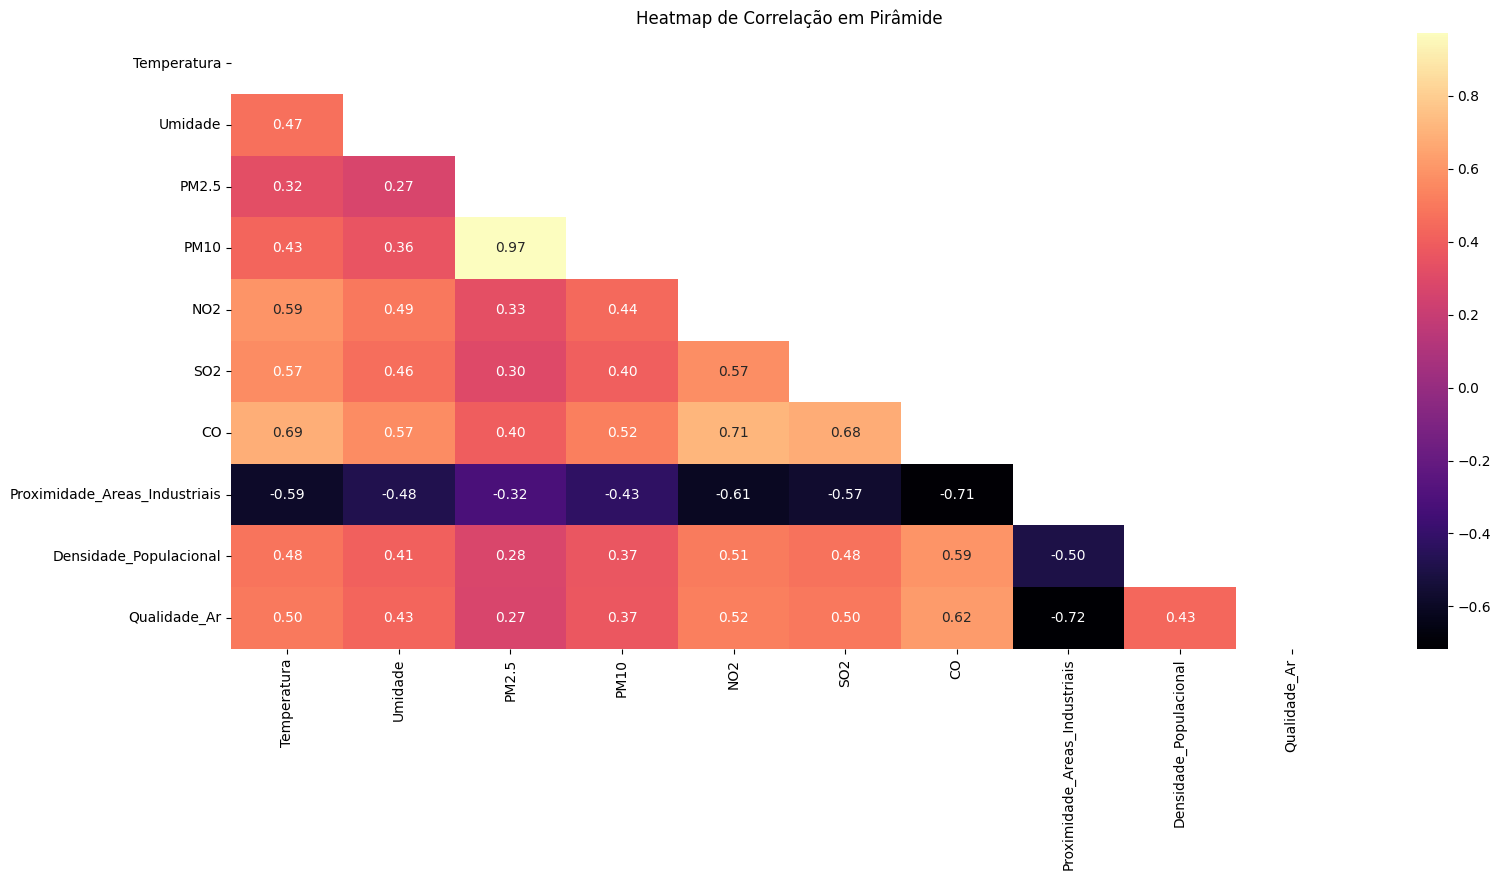

In [4]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(18, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='magma', mask=mask, cbar=True)
plt.title('Heatmap de Correlação em Pirâmide')
plt.show()

#### Análise de Colunas Numéricas

In [5]:
def criar_histograma(coluna):
    fig = px.histogram(df, x=coluna, nbins=100)
    fig.update_layout(bargap=0.1, xaxis_title=coluna, yaxis_title="Frequência")
    return fig

In [6]:
opcoes_colunas = list(df.select_dtypes(include=['int64', 'float64']).columns)
coluna_selecionada = "Temperatura"

In [7]:
grafico = criar_histograma(coluna_selecionada)
grafico.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "method": "restyle",
                    "args": [{"x": [df[coluna]]}],  
                    "label": coluna,
                }
                for coluna in opcoes_colunas
            ],
            "direction": "down",
            "showactive": True,
            "x": 0.5,
            "y": 1.2,
        }
    ]
)
grafico.show()

#### Coluna Categórica / Coluna Alvo

In [8]:
criar_histograma("Qualidade_Ar")

#### Comparação com a Coluna Alvo (Alta Correlação)

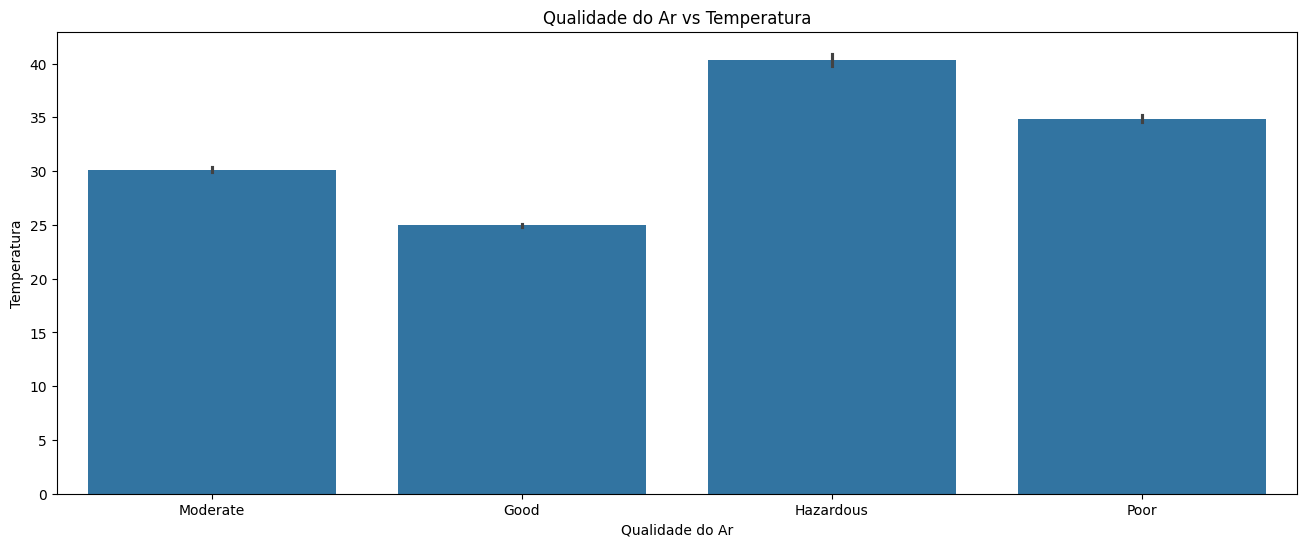

In [9]:
plt.figure(figsize=(16, 6))
sns.barplot(x="Qualidade_Ar", y="Temperatura", data=df, estimator=np.mean)  
plt.title("Qualidade do Ar vs Temperatura")
plt.xlabel("Qualidade do Ar")
plt.ylabel("Temperatura")
plt.show()

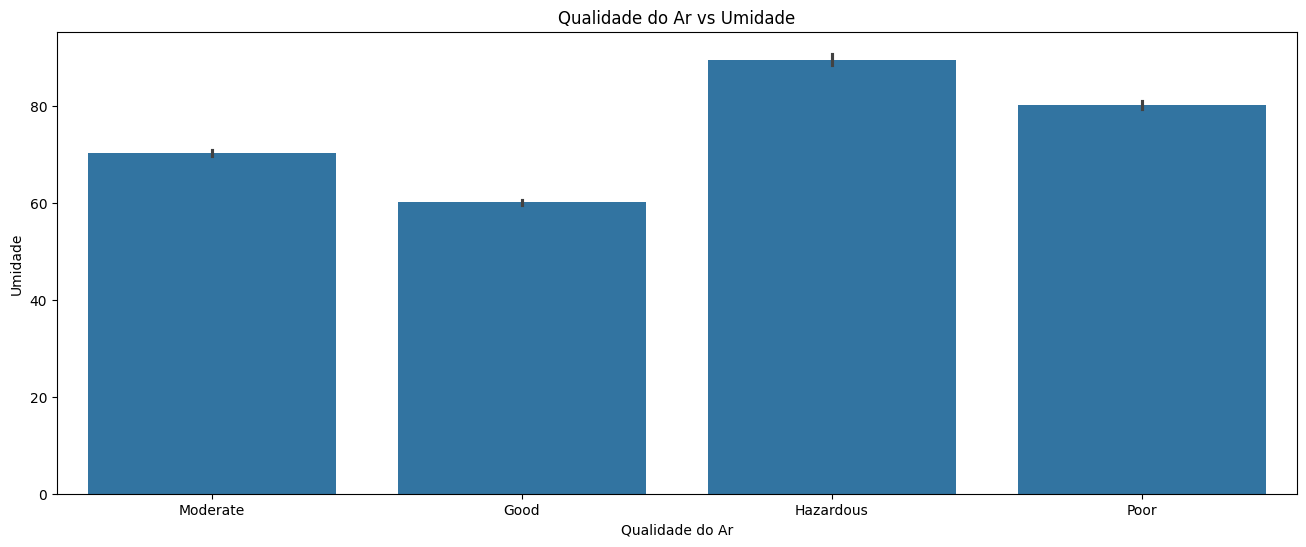

In [10]:
plt.figure(figsize=(16, 6))
sns.barplot(x="Qualidade_Ar", y="Umidade", data=df, estimator=np.mean)  
plt.title("Qualidade do Ar vs Umidade")
plt.xlabel("Qualidade do Ar")
plt.ylabel("Umidade")
plt.show()

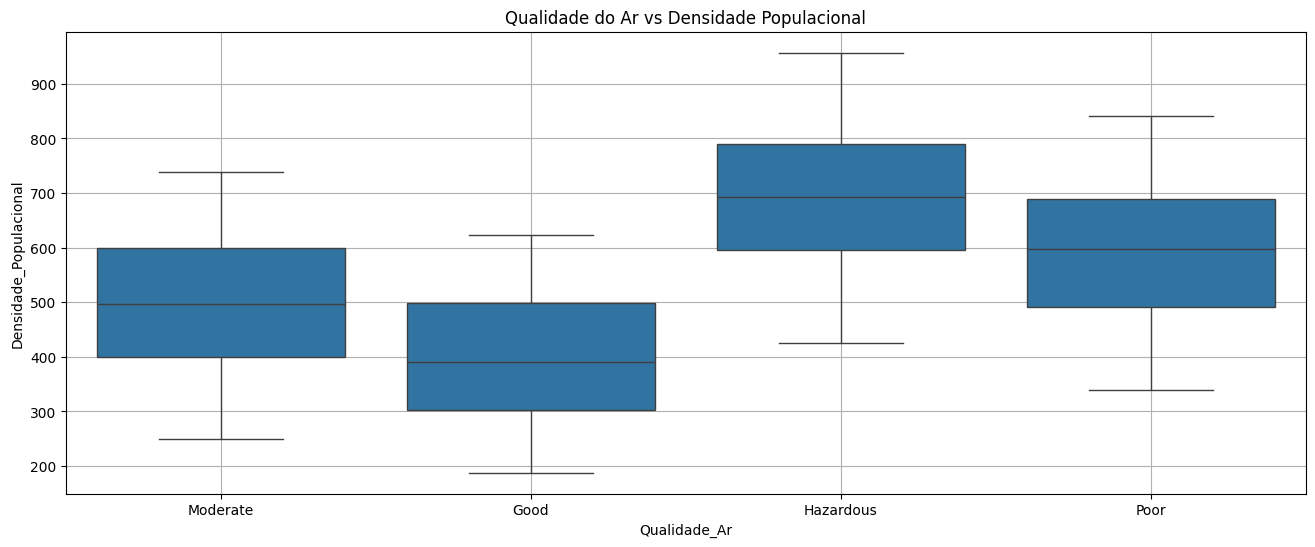

In [11]:
plt.figure(figsize=(16, 6))
sns.boxplot(
    x="Qualidade_Ar",  
    y="Densidade_Populacional",  
    data=df,  
)

plt.title("Qualidade do Ar vs Densidade Populacional")
plt.xlabel("Qualidade_Ar")
plt.ylabel("Densidade_Populacional")
plt.grid(True)
plt.show()

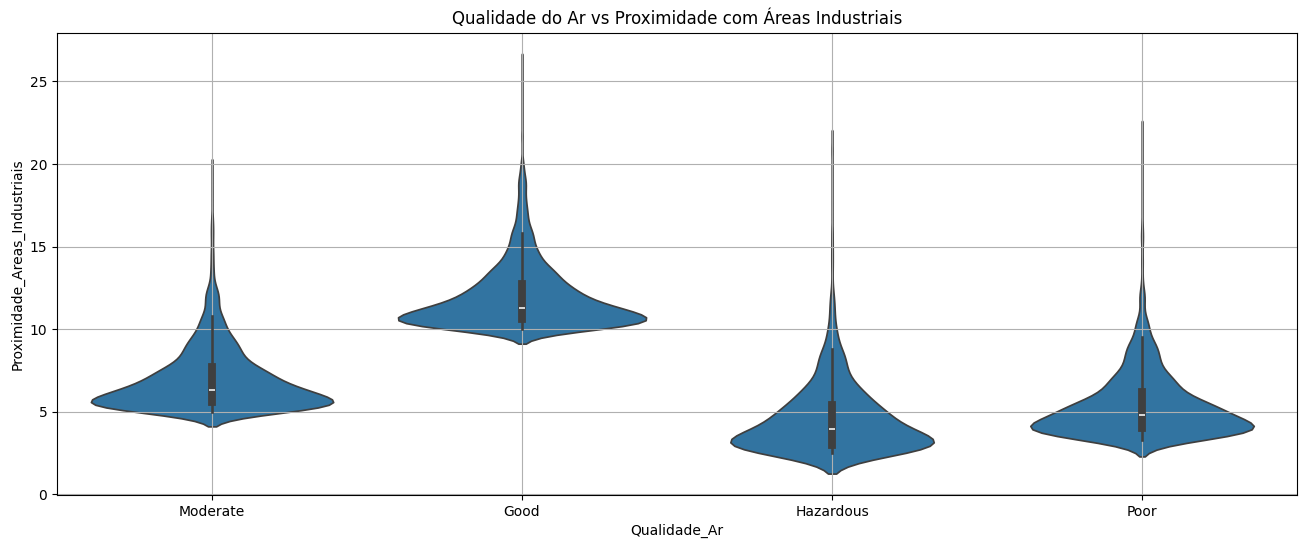

In [12]:
plt.figure(figsize=(16, 6))
sns.violinplot(
    x="Qualidade_Ar",  
    y="Proximidade_Areas_Industriais",  
    data=df,  
)

plt.title("Qualidade do Ar vs Proximidade com Áreas Industriais")
plt.xlabel("Qualidade_Ar")
plt.ylabel("Proximidade_Areas_Industriais")
plt.grid(True)
plt.show()

In [13]:
df.columns

Index(['Temperatura', 'Umidade', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximidade_Areas_Industriais', 'Densidade_Populacional',
       'Qualidade_Ar'],
      dtype='object')

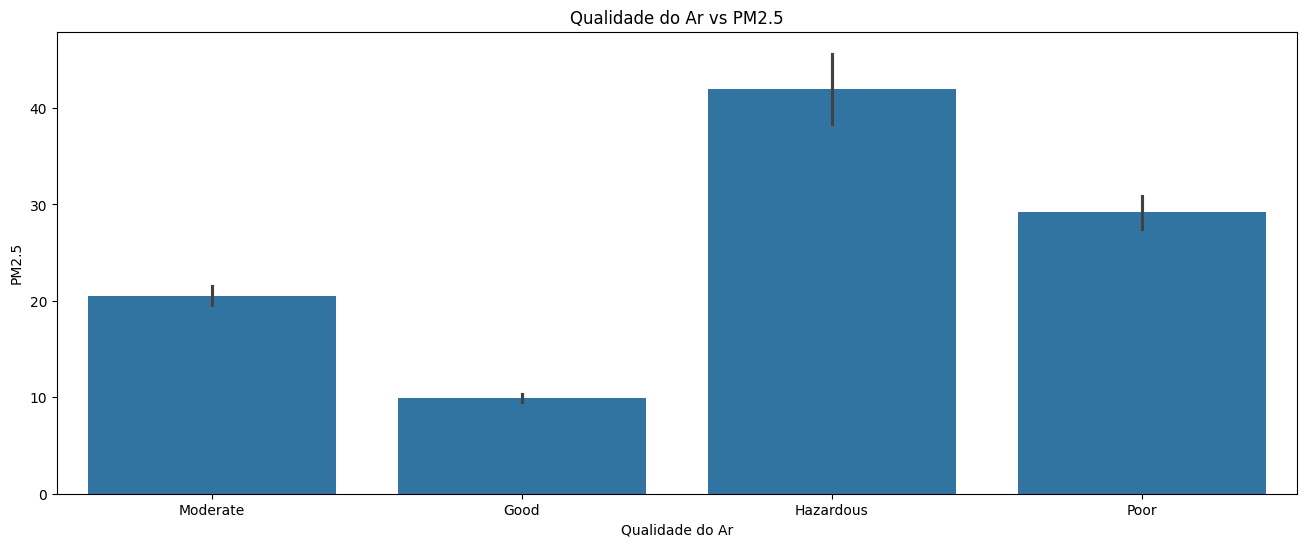

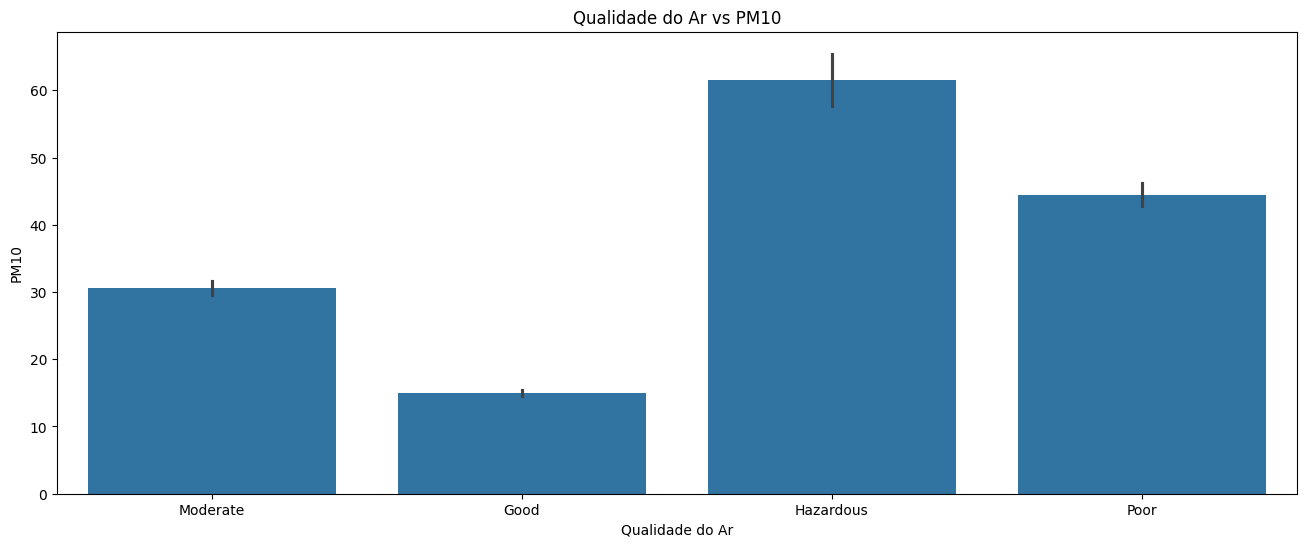

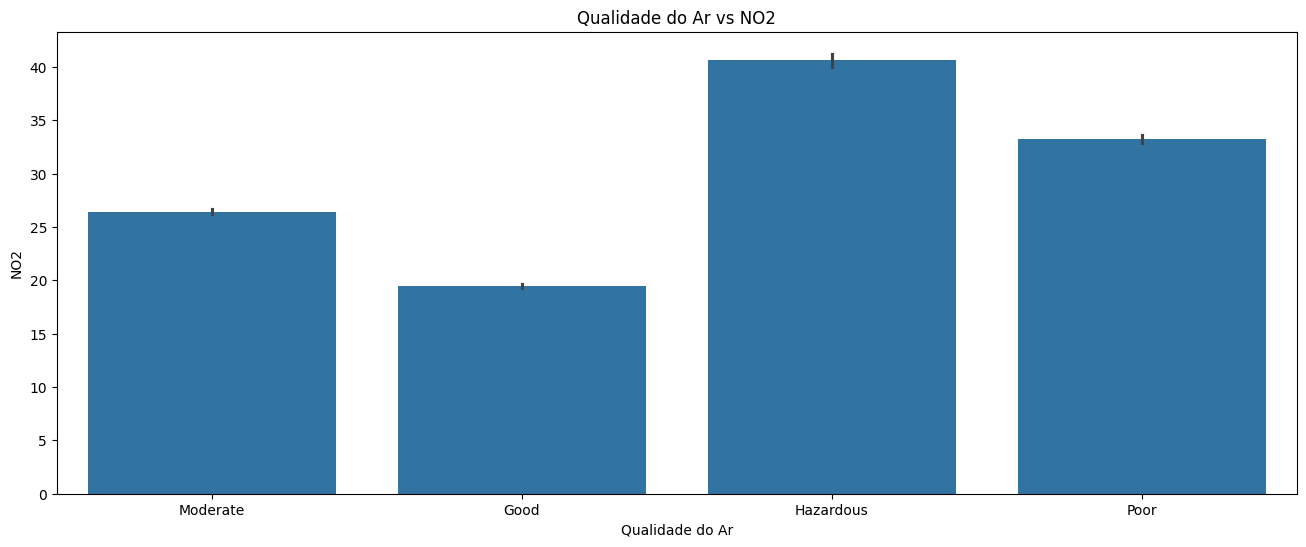

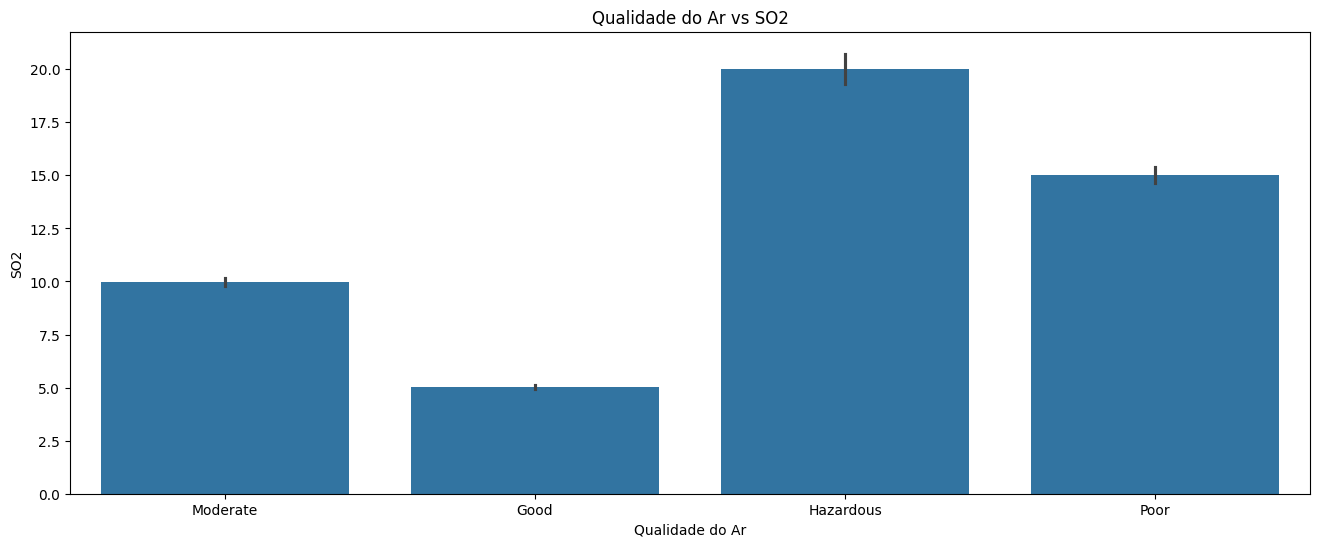

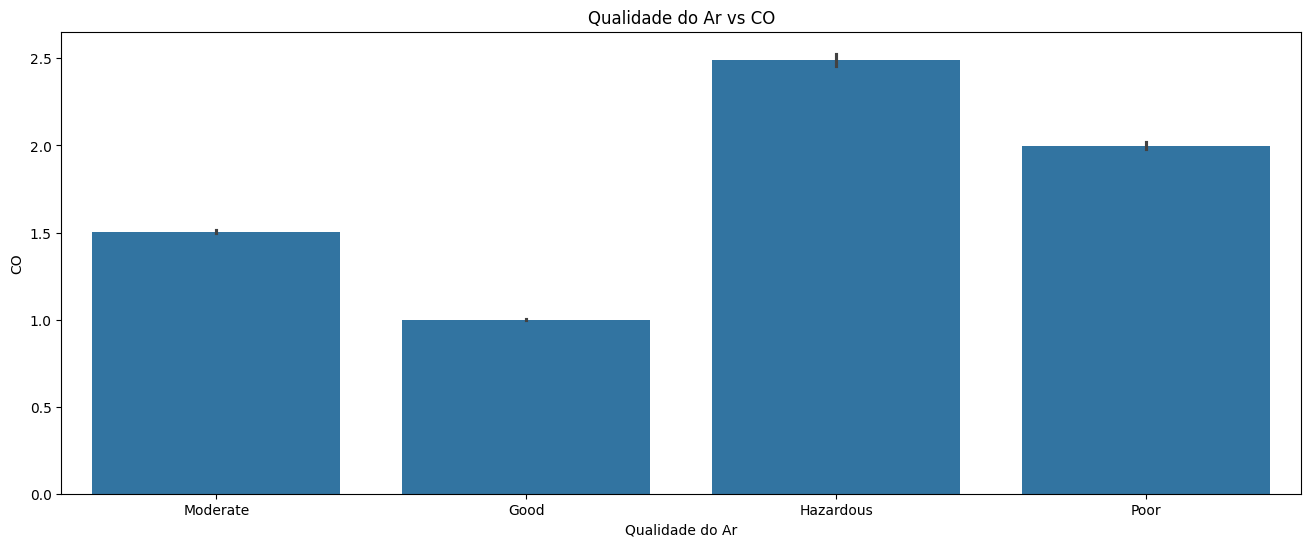

In [18]:
colunas_barra = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']

for coluna in colunas_barra:
    plt.figure(figsize=(16, 6))
    sns.barplot(x="Qualidade_Ar", y=f"{coluna}", data=df, estimator=np.mean)  
    plt.title(f"Qualidade do Ar vs {coluna}")
    plt.xlabel("Qualidade do Ar")
    plt.ylabel(f"{coluna}")
    plt.show()